<a href="https://colab.research.google.com/github/P2GONE/AI/blob/main/IDS_Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Kggle Synthetic network traffic
'''

'\nKggle Synthetic network traffic\n'

In [2]:
# Import necessary libraries
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest  # Import Isolation Forest

In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("synthetic_network_traffic.csv")
print(df.head())


Saving synthetic_network_traffic.csv to synthetic_network_traffic (1).csv
   SourceIP  DestinationIP  SourcePort  DestinationPort  Protocol  BytesSent  \
0  0.496714      -0.138264    0.647689         1.523030 -0.234153  -0.234137   
1 -0.463418      -0.465730    0.241962        -1.913280 -1.724918  -0.562288   
2  1.465649      -0.225776    0.067528        -1.424748 -0.544383   0.110923   
3 -0.601707       1.852278   -0.013497        -1.057711  0.822545  -1.220844   
4  0.738467       0.171368   -0.115648        -0.301104 -1.478522  -0.719844   

   BytesReceived  PacketsSent  PacketsReceived  Duration  IsAnomaly  
0       1.579213     0.767435        -0.469474  0.542560          0  
1      -1.012831     0.314247        -0.908024 -1.412304          0  
2      -1.150994     0.375698        -0.600639 -0.291694          0  
3       0.208864    -1.959670        -1.328186  0.196861          0  
4      -0.460639     1.057122         0.343618 -1.763040          0  


In [4]:
print(df.columns)


Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'Protocol', 'BytesSent', 'BytesReceived', 'PacketsSent',
       'PacketsReceived', 'Duration', 'IsAnomaly'],
      dtype='object')


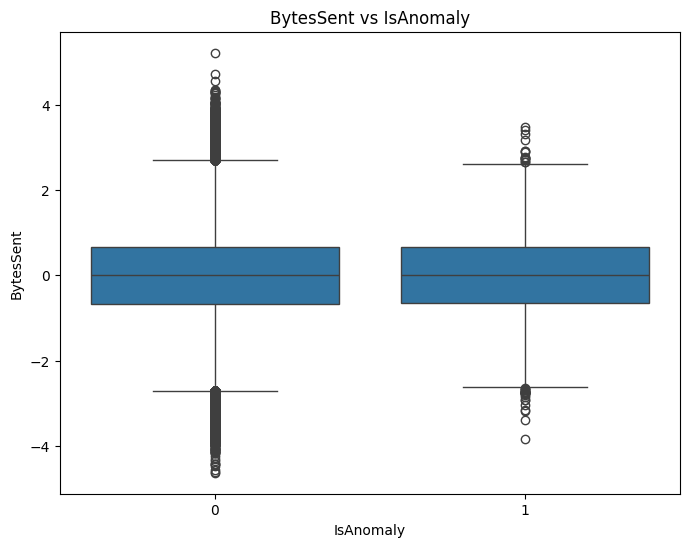

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(x="IsAnomaly", y="BytesSent", data=df)
plt.title("BytesSent vs IsAnomaly")
plt.show()


/tmp/ipython-input-1542978216.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="IsAnomaly", y="BytesSent", data=df, split=True, palette="Set2")


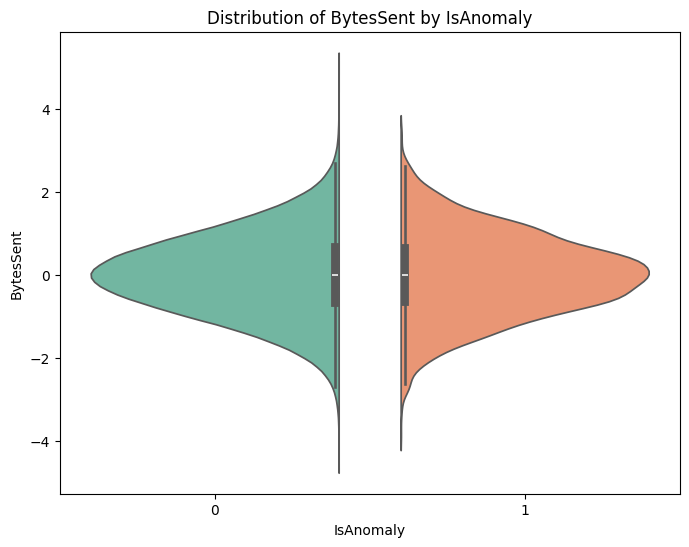

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 타겟과의 상관계수만 추출
corr_with_target = df.corr()["IsAnomaly"].sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.violinplot(x="IsAnomaly", y="BytesSent", data=df, split=True, palette="Set2")
plt.title("Distribution of BytesSent by IsAnomaly")
plt.show()



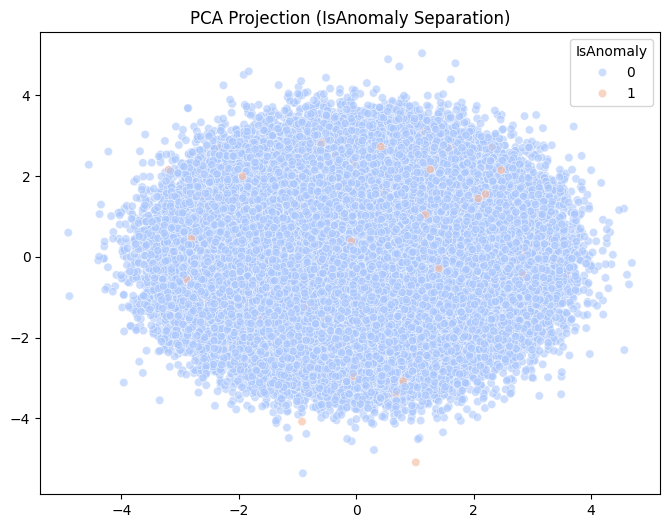

In [7]:
from sklearn.decomposition import PCA

X = df.drop("IsAnomaly", axis=1)
y = df["IsAnomaly"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="coolwarm", alpha=0.6)
plt.title("PCA Projection (IsAnomaly Separation)")
plt.show()


In [8]:

print(df["IsAnomaly"].value_counts())

IsAnomaly
0    995000
1      5000
Name: count, dtype: int64


In [9]:
# Feature Engineering: Generate additional features (you can customize this)
data = df
data['TotalBytes'] = data['BytesSent'] + data['BytesReceived']
data['TotalPackets'] = data['PacketsSent'] + data['PacketsReceived']


In [10]:
# Oversample the 'Anomaly' class to balance the class distribution
anomaly_data = data[data['IsAnomaly'] == 1]
oversampled_data = pd.concat([data, anomaly_data], axis=0)

print("원본 데이터 크기:", data.shape)
print("오버샘플링 후 데이터 크기:", oversampled_data.shape)


원본 데이터 크기: (1000000, 13)
오버샘플링 후 데이터 크기: (1005000, 13)


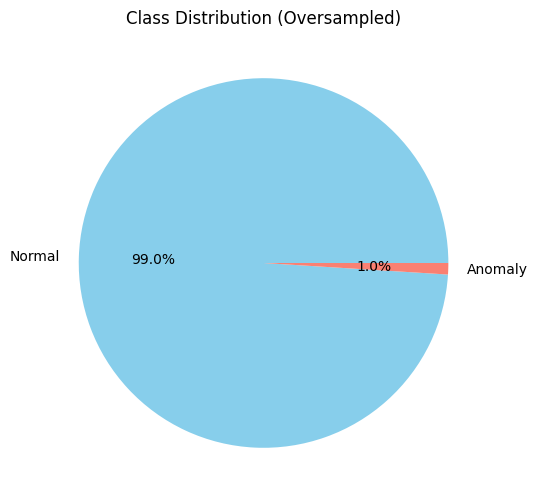

In [23]:
plt.figure(figsize=(6,6))
oversampled_data['IsAnomaly'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Normal','Anomaly'], colors=['skyblue','salmon']
)
plt.title("Class Distribution (Oversampled)")
plt.ylabel("")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


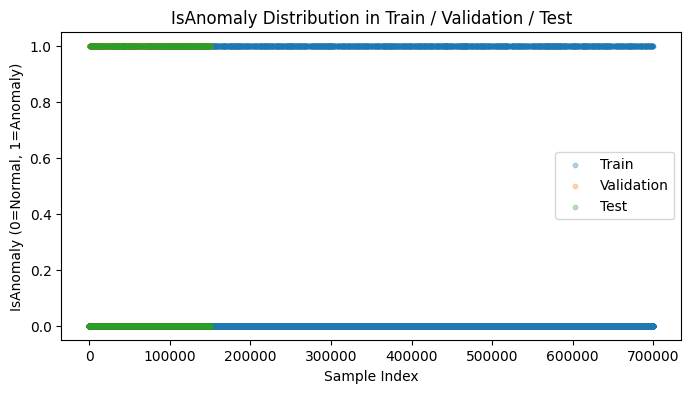

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.scatter(range(len(y_train)), y_train, alpha=0.3, s=10, label="Train")
plt.scatter(range(len(y_val)), y_val, alpha=0.3, s=10, label="Validation")
plt.scatter(range(len(y_test)), y_test, alpha=0.3, s=10, label="Test")
plt.title("IsAnomaly Distribution in Train / Validation / Test")
plt.xlabel("Sample Index")
plt.ylabel("IsAnomaly (0=Normal, 1=Anomaly)")
plt.legend()
plt.show()


In [12]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [14]:
# Create and fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

In [15]:
# Predict anomalies using the Isolation Forest
y_pred_iforest = isolation_forest.predict(X_test)
y_pred_iforest = (y_pred_iforest == -1)  # Convert -1 (anomaly) to 1, 1 (normal) to 0

In [16]:
# Create the deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, use 'sigmoid' for anomaly detection
])

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Apply threshold (adjust as needed)

Epoch 1/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.9942 - loss: 0.0383 - val_accuracy: 0.9949 - val_loss: 0.0324
Epoch 2/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.9950 - loss: 0.0318 - val_accuracy: 0.9949 - val_loss: 0.0322
Epoch 3/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - accuracy: 0.9950 - loss: 0.0320 - val_accuracy: 0.9949 - val_loss: 0.0322
Epoch 4/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.9950 - loss: 0.0317 - val_accuracy: 0.9949 - val_loss: 0.0322
Epoch 5/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.9950 - loss: 0.0318 - val_accuracy: 0.9949 - val_loss: 0.0322
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly'], zero_division=1)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

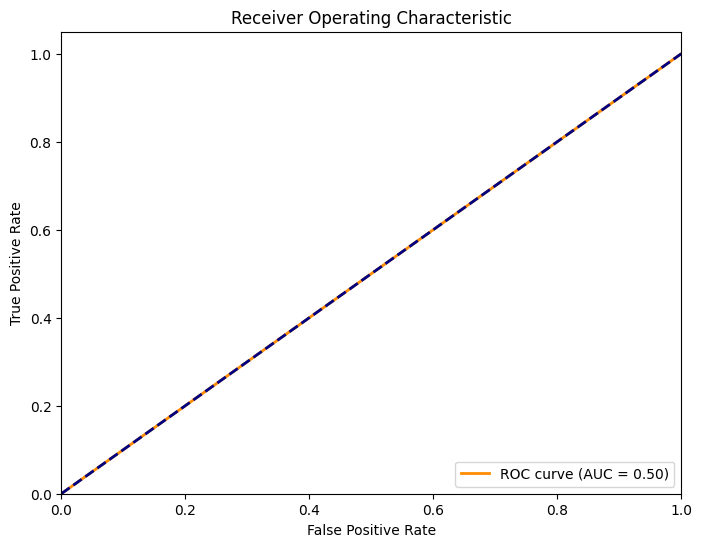

In [19]:
# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

Text(0.5, 1.0, 'Confusion Matrix')

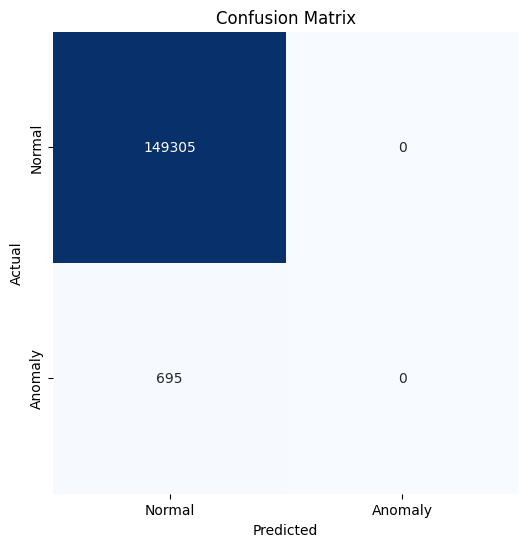

In [20]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [21]:
# Display Classification Report
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    149305
     Anomaly       1.00      0.00      0.00       695

    accuracy                           1.00    150000
   macro avg       1.00      0.50      0.50    150000
weighted avg       1.00      1.00      0.99    150000

